## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 128, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
#MOMENTUM = 0.95
#Dropout_EXP = [0.7, 0.5, 0.4, 0.25, 0.1]
Dropout_EXP = [0.2,0.3,0.4,0.5,0.6]
optimizer=Adam

In [17]:
from keras.optimizers import SGD,RMSprop,Adagrad,Adam
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for dropout in Dropout_EXP:
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=dropout)

    model.summary()
    #optimizer = keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer(lr=LEARNING_RATE))

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    name_tag_of_dropout = 'drop_rate_%.2f' % dropout
    results[name_tag_of_dropout] = {'train-loss': train_loss,
                         'valid-loss': valid_loss,
                         'train-acc' : train_acc,
                         'valid-acc' : valid_acc}

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_23 (Dropout)         (None, 128)               0   

Epoch 43/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4949 - accuracy: 0.4622 - val_loss: 1.4540 - val_accuracy: 0.4888
Epoch 44/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4978 - accuracy: 0.4628 - val_loss: 1.4708 - val_accuracy: 0.4796
Epoch 45/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4985 - accuracy: 0.4658 - val_loss: 1.4689 - val_accuracy: 0.4763
Epoch 46/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4836 - accuracy: 0.4675 - val_loss: 1.4376 - val_accuracy: 0.4952
Epoch 47/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4821 - accuracy: 0.4674 - val_loss: 1.4386 - val_accuracy: 0.4875
Epoch 48/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.4806 - accuracy: 0.4738 - val_loss: 1.4415 - val_accuracy: 0.4854
Epoch 49/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.4822 - accuracy: 0.4703 - val_

Epoch 35/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7114 - accuracy: 0.3779 - val_loss: 1.6658 - val_accuracy: 0.4085
Epoch 36/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7137 - accuracy: 0.3790 - val_loss: 1.6585 - val_accuracy: 0.4155
Epoch 37/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7031 - accuracy: 0.3802 - val_loss: 1.6538 - val_accuracy: 0.4173
Epoch 38/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.7000 - accuracy: 0.3820 - val_loss: 1.6433 - val_accuracy: 0.4161
Epoch 39/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.7011 - accuracy: 0.3832 - val_loss: 1.6328 - val_accuracy: 0.4225
Epoch 40/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6970 - accuracy: 0.3844 - val_loss: 1.6426 - val_accuracy: 0.4198
Epoch 41/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.6934 - accuracy: 0.3867 - val_

Epoch 27/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9794 - accuracy: 0.2419 - val_loss: 2.0989 - val_accuracy: 0.2215
Epoch 28/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.9806 - accuracy: 0.2410 - val_loss: 2.0317 - val_accuracy: 0.2445
Epoch 29/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9851 - accuracy: 0.2391 - val_loss: 2.0283 - val_accuracy: 0.2287
Epoch 30/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9758 - accuracy: 0.2411 - val_loss: 2.0291 - val_accuracy: 0.2365
Epoch 31/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9732 - accuracy: 0.2439 - val_loss: 2.0469 - val_accuracy: 0.2351
Epoch 32/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.9703 - accuracy: 0.2453 - val_loss: 2.0014 - val_accuracy: 0.2516
Epoch 33/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.9695 - accuracy: 0.2448 - val_

Epoch 19/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1190 - accuracy: 0.1775 - val_loss: 2.2299 - val_accuracy: 0.1365
Epoch 20/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1148 - accuracy: 0.1812 - val_loss: 2.2120 - val_accuracy: 0.1435
Epoch 21/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1164 - accuracy: 0.1815 - val_loss: 2.1875 - val_accuracy: 0.1635
Epoch 22/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.1125 - accuracy: 0.1843 - val_loss: 2.2180 - val_accuracy: 0.1453
Epoch 23/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1100 - accuracy: 0.1830 - val_loss: 2.1994 - val_accuracy: 0.1565
Epoch 24/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.1153 - accuracy: 0.1825 - val_loss: 2.2030 - val_accuracy: 0.1561
Epoch 25/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.1110 - accuracy: 0.1849 - val_

50000/50000 [==============================] - 3s 52us/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3029 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 8/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 3s 52us/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 10/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 11/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.3028 - accuracy: 0.1007 - val_loss: 2.3026 - v

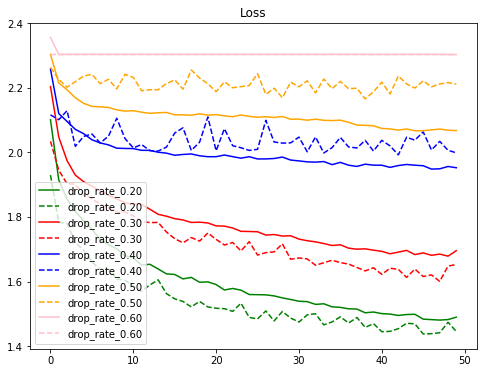

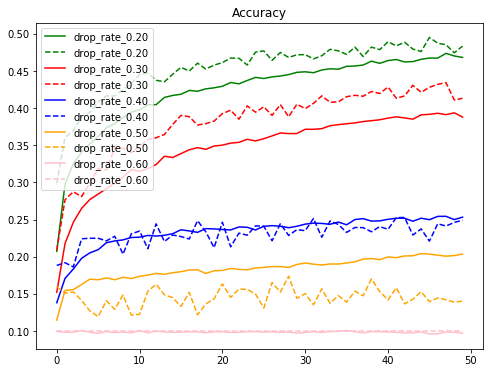

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["g", "r", "b", "orange", "pink", 'darkviolet','pink','chocolate','darkred','olive']

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Loss")
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.legend()
plt.title("Accuracy")
plt.show()